# Nonlinear Equations

## 05.01 Nonlinear Equations

Given a function f, we seek a value $x$, known as **root** or **zero** of f, for which
$$
f(x) = 0
$$

Two cases.
1. Single nonlinear equation in one unknown, $x$ is a scalar $f: \mathbb{R} \rightarrow \mathbb{R}$

Example:
$$
x^2 - 4 \sin(x) = 0
$$

2. System of $n$ coupled nonlinear equations in $n$ unknowns, $x$ is vector
$f: \mathbb{R}^n \rightarrow \mathbb{R}^n$

Example:
$$
\begin{aligned}
x_1^2 - x_2 + 0.25 &= 0 \\
-x_1 + x_2^2 + 0.25 &= 0
\end{aligned}
$$

Note: Finding $f(x) = 0$ for overdetermined systems, $m \gt n$, is covered by the chapter on optimization. 

## 05.02 Existence, Uniqueness, and Conditioning

**Bracket** is interval \[a, b\] for which sign of $f$ differs at $f(a)$ and $f(b)$.
* *Intermediate Value Theorem* if $f$ is continuous and sign($f(a)$) $\neq$ sign($f(b)$), then there exists some $x$ such that f(x) = 0.

#### Conditioning
Basic premise: If the function $f$ is insensitive to the value of the argument $x$, then the root will be sensitive.

Two cases.
1. $f: \mathbb{R} \rightarrow \mathbb{R}$ with solution $x^*$
$$
\text{cond}(f) = 1 / |f'(x^*)|
$$
  * Root is ill-conditioned if $f'(x^*) = 0$ eg horizontal.

2. $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ with solution $x^*$
$$
\text{cond}(f) = ||J_f^{-1}(x^*)|| = \partial{f_i(x)} / \partial{x_j}
$$
  * The matrix $J_f$ is known as **Jacobian** aka matrix of partial derivatives.
  * Root is ill-conditioned if $J_f$ is singular.

#### Residual
Useful as measure of error when root is not ill-conditioned.

A small residual does not necessarily imply solution is accurate.

## 05.03 Convergence of Iterative Methods

#### Iterative Methods
**Error** at iteration $k$ is given by $e_k$:
$$
e_k = x_k - x^*
$$
where
* $x_k$ is approximate solution at iteration $k$
  * For methods which maintain an interval rather than single point, then $x_k$ is the length of the interval and $x^*$ is zero.
* $x^*$ is true solution

**Convergence** given by ratio of errors of successive iterates and some rate $r$:
$$
\lim\limits_{k->\inf} \frac{||e_{k+1}||}{||e_k||^r} = C
$$
where
* $C$ is a nonzero constant describing the change from one iteration to the next

|  convergence rate $r$ | description | accuracy gained per iteration |
|-----------------------|-------------|-------------------------------|
| $r = 1$ | linear | constant |
| $1 \lt r \lt 2$ | superlinear | increasing |
| $r = 2$ | quadratic | double |

**Stopping Criteria** describe conditions for terminating iteration. Typical choices include:
1. Relative change in successive iterates is small.
$$
||x_{k+1} - x_k|| / ||x_k|| \lt \epsilon
$$
2. Residual is small.
$$
||f(x_k)|| \lt \epsilon
$$

These quantities are not necessarily small simultaneously depending on the problem conditioning.

## 05.04 Bisection Method in 1D

Bisection method begins with bracket given by $[a, b]$, repeatedly halving the interval until solution is found to some particular accuracy.
1. Compute the value of $f$ at midpoint $m$ of the bracket $[a, b]$.
2. If sign(f(a)) $\neq$ sign(f(m)), then $b = m$, else $a = m$.
3. Repeat while $b - a \gt \epsilon$.

Pros
* Certain to converge
* Simple, only makes use of sign of function, not magnitude

Cons
* Convergence is linear ($r = 1, C = 0.5$) which is slow
  * One bit of accuracy gained for each iteration (divide by half each iteration)
* Not suitable for solving systems of nonlinear equations

Find the root of the scalar function $x^2 - 4 \sin(x) = 0$ using bisection method.

In [1]:
import math
import numpy as np

def bisection(fx, a, b, tol=np.finfo('d').eps):
    """
    Compute the root of fx over some interval [a, b] using bisection.
    """
    while abs(b - a) > tol:
        m = a + (b - a) / 2.
        if np.sign(fx(a)) != np.sign(fx(m)):
            b = m
        else:
            a = m
    return a


def fx(x):
    return x*x - 4. * math.sin(x)


a, b = 1., 3.
root = bisection(fx, a, b)
print("root: ", root)

# Compare the value at root to 0.
np.testing.assert_almost_equal(fx(root), 0.)

root:  1.9337537628270212


Plot the function $x^2 - 4 \sin(x) = 0$ over the interval $[1, 3]$ with the root returned from the bisection method.

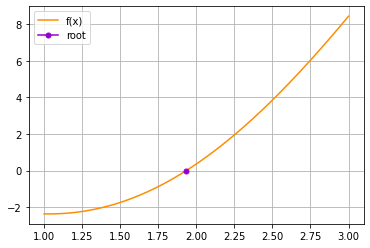

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = np.linspace(a, b, num=100)
vfx = np.vectorize(fx)

plt.plot(x, vfx(x), c='darkorange', label='f(x)')
plt.plot(root, fx(root), 
         marker='o', markersize=5.0, c='darkviolet', label='root')
plt.grid()
plt.legend()
plt.show()

## 05.05 Fixed-Point Iteration in 1D

**Fixed point** of a function $g$ is a value $x$ such that $x = g(x)$.
* Iterative methods for nonlinear equations use fixed-point scheme:
$$
x_{k+1} = g(x_k)
$$
* For some nonlinear equation $f(x) = 0$ there can be **multiple equivalent** choices for $g$.

Examples, let $f(x) = x^2 - x - 2$ so that $f(2) = 0$
1. $g(x) = x^2 - 2$ and $g(2) = 2$
2. $g(x) = 1 + 2/x$ and $g(2) = 2$
3. $g(x) = \sqrt{x + 2}$ and $g(2) = 2$

#### Convergence
If $x^* = g(x^*)$ and $|g'(x^*)| \lt 1$ then there is an interval containing $x^*$ that converges using fixed-point iteration.

If $|g'(x^*)| \gt 1$, then fixed-point iteration diverges.

## 05.06 Newton's Method in 1D

#### Truncated Taylor Series
The function $f(x + h)$ is a linear function of $h$ that approximates $f$ near $x$.
$$
f(x + h) \approx f(x) + f'(x) h
$$

Solve nonlinear equation by replacing with linear approximation using Taylor series.

#### Newton's Method
1. Start with some initial guess $x_0$.
2. Compute $x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$.
3. Repeat the previous step until some stopping criteria is reached.


**Convergence**

Transform $f(x) = 0$ to the fixed point problem $g(x) = x - f(x) / f'(x)$.
* Convergence rate is quadratic $(r = 2)$.
* The initial guess, $x_0$, must be close to $f(x) = 0$ in order to converge.
* Unlike bisection, Newton's method is **not** guaranteed to converge.

Find the root of scalar function $x^2 - 4 \sin(x) = 0$ using Newton's method.

In [3]:
import math
import numpy as np

def newton1droot(fx, dfx, x0, tol=np.finfo('d').eps):
    """
    Compute the root of fx near x0 using Newton's method.
    """
    xk, fxk = x0, fx(x0)
    hk = 1.  # Any nonzero value.

    # Stop iteration when hk = 0 or fxk = 0.
    while abs(hk)/abs(xk) > tol or abs(fxk) > tol:
        hk = -1. * fxk / dfx(xk)
        xk = xk + hk
        fxk = fx(xk)
    return xk


def fx(x):
    return x*x - 4. * math.sin(x)

def dfx(x):
    return 2.*x - 4. * math.cos(x)


root = newton1droot(fx, dfx, x0=3., tol=1e-7)
print("root: ", root)

# Compare the value at root to 0.
np.testing.assert_almost_equal(fx(root), 0.)

root:  1.9337537628270216


## 05.07 Interpolating Methods in 1D

#### Secant Method
Like Newton's Method, but replace explicit derivative with finite difference.
$$
x_{k+1} = x_k - f(x_k) \frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}
$$

Convergence rate is superlinear ($r \approx 1.618$)

Find the root of scalar function $x^2 - 4 \sin(x) = 0$ using Secant method.

In [4]:
import math
import numpy as np

def secant1d(fx, x0, tol=np.finfo('d').eps):
    """
    Compute the root of fx near x0 using Secant method.
    """
    # Initialize xk, xk1 and fxk, fxk1 to current & previous iterate.
    xk, xk1 = x0, 2.*x0
    fxk, fxk1 = fx(xk), fx(xk1)
    hk = 1.  # Any nonzero value.

    # Stop iteration when hk = 0 or fxk = 0.
    while abs(hk)/abs(xk) > tol or abs(fxk) > tol:
        hk = -1. * fxk * (xk - xk1)/(fxk - fxk1)
        xk, xk1 = xk + hk, xk
        fxk, fxk1 = fx(xk), fxk
    return xk


def fx(x):
    return x*x - 4. * math.sin(x)

root = secant1d(fx, x0=3., tol=1e-7)
print("root: ", root)

# Compare the value at root to 0.
np.testing.assert_almost_equal(fx(root), 0.)

root:  1.9337537628270214


#### Higher-Degree Interpolation
Like Secant method, but replace 2-point interpolation with higher degree polyonmial.

Quadratic interpolation aka Muller's method has superlinear convergence ($r \approx 1.839$)

#### Inverse Interpolation
Fit $x_k$ as a function of $y_k = f(x_k)$ using polynomial $p(y)$.

1. Start with initial $a, b, c$ with $b$ straddling $a$ and $c$.
2. Compute
$$
u = f_b/f_c, \quad v = f_b/f_a, \quad w = f_a/f_c
$$
3. Compute
$$
p = v \times (w \times (u-w)(c-b) - (1-u)(b-a)) \quad q = (w-1)(u-1)(v-1)
$$
4. Compute new solution $x_k = b + p / q$.
5. Replace $c$ with old $a$, $a$ with old $b$, and $b$ with new $x_k$.
6. Repeat from step 2.

Inverse interpolation also has superlinear convergence ($r \approx 1.839$)

Find the root of scalar function $x^2 - 4 \sin(x) = 0$ using Inverse Interpolation.

In [5]:
import math
import numpy as np

def inverse_interp1d(fx, a, b, c, tol=np.finfo('d').eps):
    """
    Compute the root of fx near x0 using Inverse interpolation.
    """
    # Initialize fa, fb, fc.
    fa, fb, fc = fx(a), fx(b), fx(c)
    hk, xk = 1., 1.  # Any nonzero value.

    # Stop iteration when hk = 0 or fb = 0.
    while abs(hk)/abs(xk) > tol or abs(fb) > tol:
        u, v, w = fb/fc, fb/fa, fa/fc
        p = v * (w * (u-w) * (c-b) - (1.-u) * (b-a))
        q = (w-1.) * (u-1.) * (v-1.)
        hk = p/q
        xk = b + hk
        c, fc = a, fa
        a, fa = b, fb
        b, fb = xk, fx(xk)
    return xk


def fx(x):
    return x*x - 4. * math.sin(x)

root = inverse_interp1d(fx, a=1., b=2., c=3., tol=1e-7)
print("root: ", root)

# Compare the value at root to 0.
np.testing.assert_almost_equal(fx(root), 0.)

root:  1.9337537628270212


## 05.08 Hybrid Methods

Secant and interpolation methods converge rapidly, but require initial values close to solution.

Bisection method converges slowly, but are less sensitive to initial values.

#### Hybrid methods
Use secant or interpolation, but maintain a bracket around solution.
* If an approximate solution ever falls outside of bracket, perform one iteration of bisection.
* Combines features to achieve speed and reliability.

## 05.09 Newton's Method for Nonlinear Systems

#### Fixed-Point Iteration
For fixed point methods of non-linear systems replace scalar $x$ with vector $x$.

Problem statement: Find some vector $x$ such that $x = g(x)$ and $g: \mathbb{R}^n \rightarrow \mathbb{R}^n$.

#### Convergence
If spectral radius $\rho$ of Jacobian matrix $\rho(G(x^*)) \lt 1$ then fixed-point iteration converges if started close enough to solution.

#### Newton's Method
In n-dimensions Newton's method given by:
$$
x_{k+1} = x_k - J(x_k)^{-1} f(x_k)
$$
where
* $J(x)$ is Jacobian matrix of $f$

In practice, the Jacobian is not inverted but instead solve linear system for $s_k$:
$$
J(x_k) s_k = -f(x_k)
$$
where
* $s_k$ is Newton step such that $x_{k+1} = x_k + s_k$

Newton's method for vector functions has quadratic convergence ($r = 2$)

Cost of Newton's method per iteration is substantial:
* Computing Jacobian matrix: $n^2$
* Solving linear system: $O(n^3)$

#### Jacobian Matrix
Given the nonlinear system of equations $f : \mathbb{R}^n \rightarrow \mathbb{R}^n$:
$$
x_1 + 2 x_2 - 2 = 0 \\
x_1^2 + 4 x_2^2 - 4 = 0
$$

The Jacobian matrix of $J(x)$ is formed from:
$$
{J_f(x)}_{ij} = \frac{\partial f_i(x)}{\partial x_j}
$$
where
* $f_i(x)$ is the ith system of equations

Given the above system $f$, the partial derivatives are:
$$
\frac{\partial f_1(x)}{\partial x_1} = \frac{\partial (x_1 + 2 x_2 - 2)}{\partial x_1} = 1 \\
\frac{\partial f_1(x)}{\partial x_2} = \frac{\partial (x_1 + 2 x_2 - 2)}{\partial x_2} = 2 \\
\frac{\partial f_2(x)}{\partial x_1} = \frac{\partial (x_1^2 + 4 x_2^2 - 4)}{\partial x_1} = 2 x_1 \\
\frac{\partial f_2(x)}{\partial x_2} = \frac{\partial (x_1^2 + 4 x_2^2 - 4)}{\partial x_2} = 8 x_2
$$

The Jacobian matrix formed from these partial derivatives is:
$$
J(x) =
\begin{bmatrix}
\frac{\partial f_1(x)}{\partial x_1} & \frac{\partial f_1(x)}{\partial x_2} \\
\frac{\partial f_2(x)}{\partial x_1} & \frac{\partial f_2(x)}{\partial x_2}
\end{bmatrix} = 
\begin{bmatrix}
1 & 2 \\
2 x_1 & 8 x_2
\end{bmatrix}
$$

Use Newton's method to solve the nonlinear system:
$$
x_1 + 2 x_2 - 2 = 0 \\
x_1^2 + 4 x_2^2 - 4 = 0
$$

In [6]:
import numpy as np
import scipy.optimize as opt

def newtonNdroot(fx, Jfx, x0, tol=np.finfo('d').eps):
    """
    Solve the nonlinear n x n system using Newton's method.
    """
    xk, fxk = x0, fx(x0)

    # Stop iteration when ||f(xk)|| = 0.
    while np.linalg.norm(fxk) > tol:
        # Solve J(xk) sk = -f(sk) for sk.
        sk = np.linalg.solve(Jfx(xk), -1. * fxk)
        xk = xk + sk
        fxk = fx(xk)
    return xk


def fx(xk):
    """
    Compute the nonlinear system at xk.
    """
    F = np.array([1,2,-2,1,4,-4], dtype='d').reshape(2,3)
    x = np.stack((np.append(xk, 1), 
                  np.square(np.append(xk, 1))), axis=0)
    return np.sum(F * x, axis=1)


def Jfx(xk):
    """
    Compute the Jacobian at xk.
    """
    Jf = np.array([1,2,2,8], dtype='d').reshape(2,2)
    x = np.stack(([1,1], xk), axis=0)
    return Jf * x  # Elementwise multiplication.


x0 = np.array([1,2])
root = newtonNdroot(fx, Jfx, x0=x0, tol=1e-7)
print("root: ", root)

# Compare to the value returned from scipy.optimize.root.
expected = opt.root(fx, x0, jac=Jfx)
np.testing.assert_almost_equal(root, expected.x)

root:  [-6.27144051e-09  1.00000000e+00]


## 05.10 Secant Updating Methods

Secant updating methods reduce cost of Newton's method by:
* Build an approximate Jacobian rather than explicit derivatives
* Use factorization of approximate Jacobian to avoid repeated computation at each iteration

Secant updating methods have superlinear convergence ($1 \lt r \lt 2$)
* Slower to converge than Newton's method, but cost-per-iteration is less.

#### Broyden's Method
1. Start with some initial guess $x_0$ and approximate Jacobian $B_0$.
2. Solve $B_k s_k = -f(x_k)$ for $s_k$.
3. Compute $x_{k+1} = x_k + s_k$.
4. Compute difference in iterates $y_k = f(x_{k+1}) - f(x_k)$.
5. Update approximate Jacobian (note: use of outer product in numerator).
$$
B_{k+1} = B_k + \frac{(y_k - B_k s_k) s_k^T}{s_k^T s_k}
$$
6. Repeat from step 2 until some stopping criteria is reached.

Replace $B_k$ update with factorization to reduce $O(n^3)$ work to $O(n^2)$.

Use Broyden's method to solve the nonlinear system:
$$
x_1 + 2 x_2 - 2 = 0 \\
x_1^2 + 4 x_2^2 - 4 = 0
$$

In [7]:
import numpy as np
import scipy.optimize as opt

def broyden(fx, B0, x0, tol=np.finfo('d').eps):
    """
    Solve the nonlinear n x n system using Broyden's method.
    
    The value B0 is an initial guess for the approximate Jacobian.
    """
    xk, fxk, Bk = x0, fx(x0), B0

    # Stop iteration when ||f(xk)|| = 0.
    while np.linalg.norm(fxk) > tol:
        # Solve Bk sk = -f(xk) for sk.
        sk = np.linalg.solve(Bk, -1. * fxk)
        # Update xk.
        xk = xk + sk
        fxk1 = fx(xk)
        # Compute difference in iterates.
        yk = fxk1 - fxk
        # Update approximate Jacobian.
        Bk = Bk + np.outer(yk - np.dot(Bk, sk), sk.T) / np.dot(sk.T, sk)
        fxk = fxk1
    return xk


def fx(xk):
    """
    Compute the nonlinear system at xk.
    """
    F = np.array([1,2,-2,1,4,-4], dtype='d').reshape(2,3)
    x = np.stack((np.append(xk, 1), 
                  np.square(np.append(xk, 1))), axis=0)
    return np.sum(F * x, axis=1)


tol = 1e-7

# Initial guess and approximate Jacobian.
x0 = np.array([1,2])
B0 = np.array([1,2,2,16], dtype='d').reshape(2,2)
root = broyden(fx, B0=B0, x0=x0, tol=tol)
print("root: ", root)

# Compare to the value returned from scipy.optimize.root.
# NOTE(mmorais): When using `broyden1` explicit tolerance required.
expected = opt.root(fx, x0, method='broyden1', tol=tol)
np.testing.assert_almost_equal(root, expected.x)

root:  [-7.78185415e-11  1.00000000e+00]


## Summary: Nonlinear Equations

* Bisection is a safe, but slow method suitable for 1D only.
* Secant and Newton's method are fast, but risky methods.
  * Newton's method in 1D requires explicit derivative and in 2D Jacobian.
* Hybrid methods combine fast methods with bisection when approximate solution goes out of a bracket aka interval.
* Newton's method in 2D is expensive since it requires computing Jacobian and solving a linear system.
* Broyden's method (2D) reduces cost in comparison to Newton's method due to use of approximate Jacobian.